# Feature engineering :
process of using domain knowledge to extract features from raw data.
these features can be used to improve the performance of ML algorithms




Feature Engineering FE:
1.Feature transformation : first step in FE
- missing value imputation
- handiling categorical features 
- outlier detection
- feature scaling

2. Featuring construction:manually creating new features based exsisting features
3. Feature selection: selecting important features from given features
4. Feature Extraction: creating new features based exsisting by using alogrithms

# Handeling missing values:
-sci-kit lern does not accept missing values
-Remove or fill the missing values
 
# Handeling categorical values: converting strings into numbers
-one hot encoding: 010101 waala

# Outlier detection: detect and remove outliers

# feature scaling: 
-2 coulmns say age(18-100) and salary(10000-100000)
- as the deferance between scale of age and salary is more the salary feature 
will dominate over the age feature
- so we bring in one scale say(-1 to 1)
- It is a technique to standardize the independent features present in the
data in a fixed range
feature scaling : a) standardazation (Z-score Normalization) b) Normalization



a) stanardization:
- the new values after standardazation will have mean =0 and S.D =1
- geometric intution:  mean centring (mean will be on orgin)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/Social_Network_Ads.csv')
df=df.iloc[:,2:] # selecting only certain rows
df.head(5)


,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [7]:
# test train split
# before feature scaling always perform test train split
x=df.drop('Purchased', axis=1)
y=df['Purchased']


In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3,random_state=0)
x_train.shape, x_test.shape

((280, 2), (120, 2))

In [11]:
# standard scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

# fit the scaler to train set, it will learn the parameters
scaler.fit(x_train)

# transform train and test sets
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test) 


In [12]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [13]:
x_train_scaled
# obtained values is in numpy array
# converting it into pandas datafram

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [14]:
x_train_scaled=pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [15]:
x_train_scaled.head()

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047


In [19]:
np.round(x_train.describe(),1) # seeing the values before scaling

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [18]:
np.round(x_train_scaled.describe(), 1)
# after scaling 
# mean =0 and sd=1

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


Text(0.5, 1.0, 'after scaling')

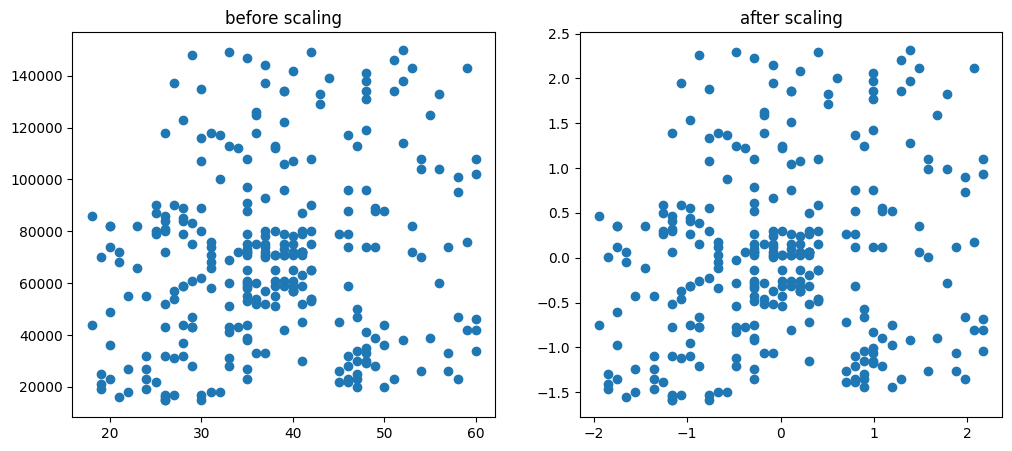

In [20]:
# effect of scaling
fig, (ax1,ax2)=plt.subplots(ncols=2, figsize=(12,5))
# plotting scatter plot before and after scaling
ax1.scatter(x_train['Age'], x_train['EstimatedSalary'])
ax1.set_title('before scaling')
ax2.scatter(x_train_scaled['Age'], x_train_scaled['EstimatedSalary'])
ax2.set_title('after scaling')

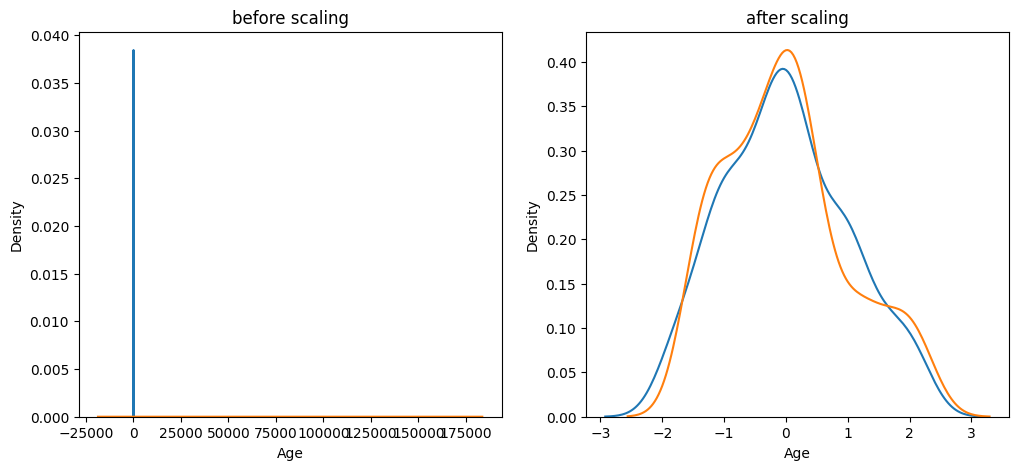

In [25]:
# excatly same only scale is changed 

# to know the effect of scaling we plot PDF
# effect of scaling
fig, (ax1,ax2)=plt.subplots(ncols=2, figsize=(12,5))
# plotting PDF plot before and after scaling
sns.kdeplot(x_train['Age'], ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)
ax1.set_title('before scaling')
sns.kdeplot(x_train_scaled['Age'], ax=ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2)
ax2.set_title('after scaling')
plt.show()

since the scales of age and salary scales are diffrent there is
no comaprision
after scaling the PDE are compariable

In [26]:
# why scaling is important?
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr_scaled=LogisticRegression()

In [29]:
lr.fit(x_train, y_train) # training on not scaled data
lr_scaled.fit(x_train_scaled, y_train) # training on scaled data

LogisticRegression()

In [30]:
y_pred=lr.predict(x_test)
y_pred_scaled=lr_scaled.predict(x_test_scaled)

In [31]:
from sklearn.metrics import accuracy_score
print("actual", accuracy_score(y_test,y_pred))
print("scaled", accuracy_score(y_test,y_pred_scaled))

actual 0.6583333333333333
scaled 0.8666666666666667


# we can cleary see the scaling improves the performance of the ml model

In [38]:
# for some algorithm such as decision tree and others
# scaling has no effect
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt_scaled=DecisionTreeClassifier()

dt.fit(x_train, y_train) # training on not scaled data
dt_scaled.fit(x_train_scaled, y_train) # training on scaled data

y_pred=dt.predict(x_test)
y_pred_scaled=dt_scaled.predict(x_test_scaled)

In [40]:
print("actual", accuracy_score(y_test,y_pred))
print("scaled", accuracy_score(y_test,y_pred_scaled))

actual 0.875
scaled 0.8666666666666667


# effect of outliers on the scaling

In [58]:
# adding some new outliers in the oridinal data
# adding 3 rows
df = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)


<ipython-input-58-07b2d76afd6c>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)


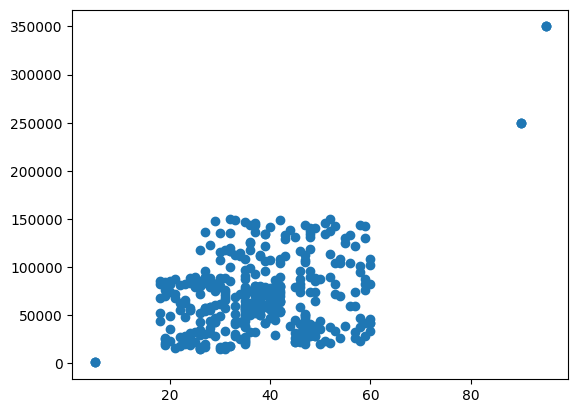

In [59]:
plt.scatter(df['Age'], df['EstimatedSalary'])


In [63]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

x_train.shape, x_test.shape

((286, 2), (123, 2))

In [64]:
# splitting the data before scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(x_train)

# transform train and test sets
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [65]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)


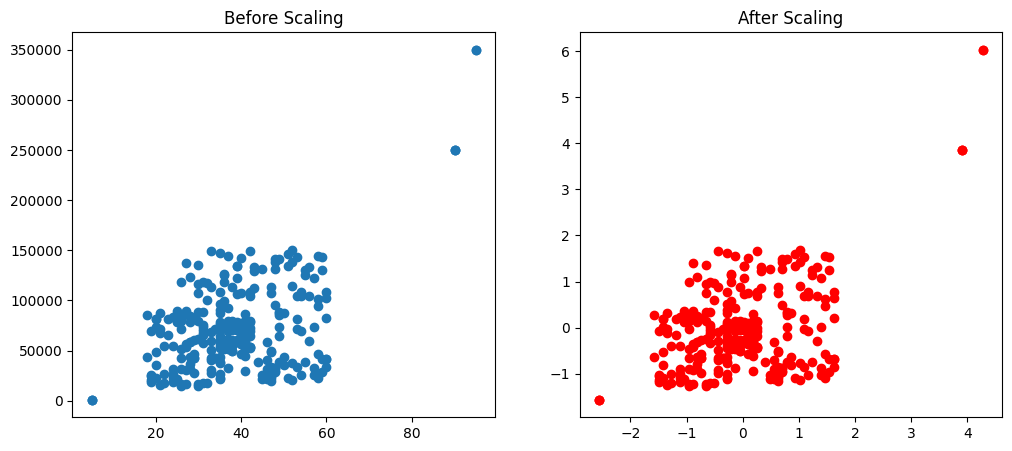

In [66]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(x_train['Age'], x_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(x_train_scaled['Age'], x_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

NO effect of scaling on outliers hence it nessary to remove outlier from the dataset